# Importing libraries for both data reading  and analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# reading the dataset
x=pd.read_csv("autolib_daily_events_postal_code.csv")
x.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


# Data understanding

In [3]:
# reading the tail of the dataset to check for any anomalies
x.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [4]:
# checking the shape of the data
x.shape

(16085, 13)

In [5]:
# knowing more about our columns and rows
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [6]:
# checking the dtypes of our columns
x.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

# Data cleaning

In [17]:
# renaming columns 
x2=x.rename(columns={'Postal code':'Postal_code','n_daily_data_points':'daily_data_points','dayOfWeek':'day_of_week','BlueCars_taken_sum':'bluecars_taken_sum','BlueCars_returned_sum':'bluecars_returned_sum'})
x2

,Postal_code,date,daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [18]:
# checking for null values 
x2.isnull().sum()
# there are no null values within our dataset

Postal_code               0
date                      0
daily_data_points         0
day_of_week               0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [19]:
# looking for duplicates 
x2.duplicated().sum()

0

In [20]:
# checking for descriptive statistics
x2.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal_code,16085.0,88791.293876,7647.342000,75001.0,91330.0,92340.0,93400.0,95880.0
daily_data_points,16085.0,1431.330619,33.212050,1174.0,1439.0,1440.0,1440.0,1440.0
day_of_week,16085.0,2.969599,2.008378,0.0,1.0,3.0,5.0,6.0
bluecars_taken_sum,16085.0,125.926951,185.426579,0.0,20.0,46.0,135.0,1352.0
bluecars_returned_sum,16085.0,125.912714,185.501535,0.0,20.0,46.0,135.0,1332.0
Utilib_taken_sum,16085.0,3.698290,5.815058,0.0,0.0,1.0,4.0,54.0
Utilib_returned_sum,16085.0,3.699099,5.824634,0.0,0.0,1.0,4.0,58.0
Utilib_14_taken_sum,16085.0,8.600560,12.870098,0.0,1.0,3.0,10.0,100.0
Utilib_14_returned_sum,16085.0,8.599192,12.868993,0.0,1.0,3.0,10.0,101.0
Slots_freed_sum,16085.0,22.629033,52.120263,0.0,0.0,0.0,5.0,360.0


In [21]:
# Detecting outliers and how to remove them

<AxesSubplot:>

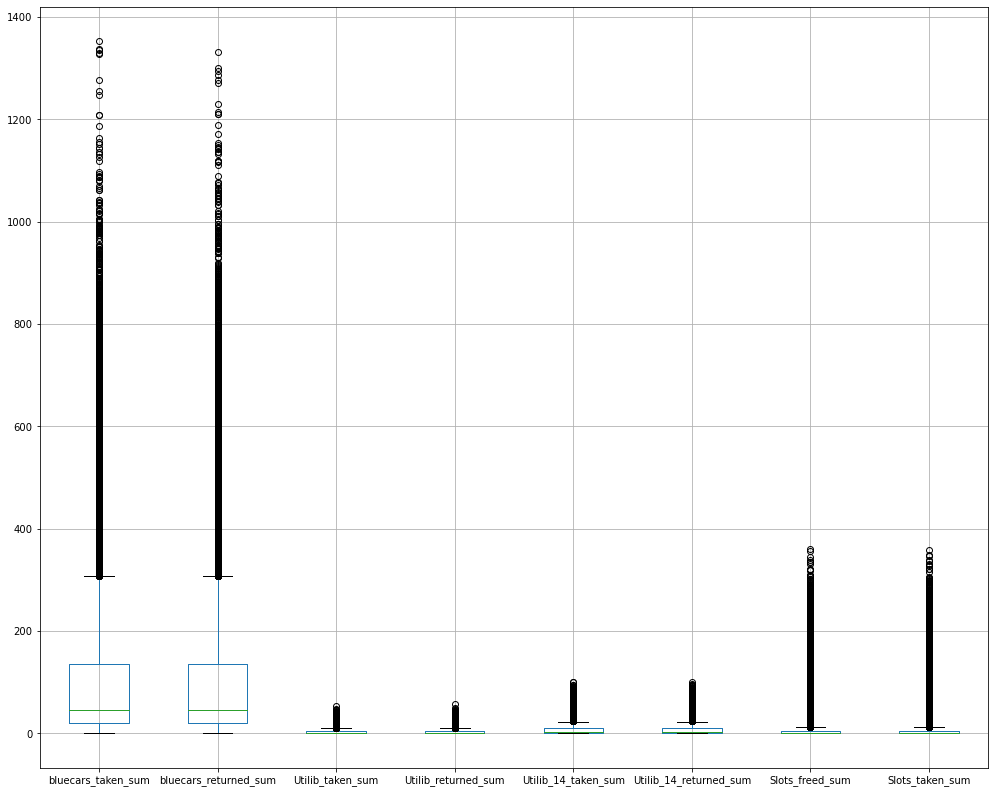

In [22]:
# detecting outliers
x2.boxplot(column=['bluecars_taken_sum','bluecars_returned_sum','Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum','Slots_freed_sum','Slots_taken_sum'],figsize=[17,14])

In [23]:
# droppimg outliers
def remove_outliers(df_in,col_name):
    q1=df_in[col_name].quantile(0.25)
    q3=df_in[col_name].quantile(0.75)
    iqr=q3-q1
    fence_low=q1-1.5*iqr
    fence_high=q3+1.5*iqr
    df_out=df_in.loc[(df_in[col_name]>fence_low)&(df_in[col_name]<fence_high)]
    return df_out

In [24]:
x3=remove_outliers(x2,'Utilib_taken_sum')
x4=remove_outliers(x3,'Utilib_returned_sum')
x4.shape


(13543, 13)

# Data anslysis(univariate and bivariate)

In [58]:
# groping data by postal code
grouped = x4.reset_index().groupby('Postal_code')
grouped.head()
# further grouping data that was collected on basis  targeted postal code
gg=grouped.get_group(75001)
gg.head()

,index,Postal_code,date,daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


<AxesSubplot:>

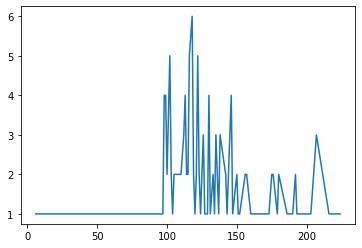

In [61]:
# a line graph showing the distributiion of blue cars taken
gg['bluecars_taken_sum'].value_counts().sort_index().plot.line()

<ipython-input-62-3750c613d674>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x5['date']=pd.to_datetime(x5['date'])


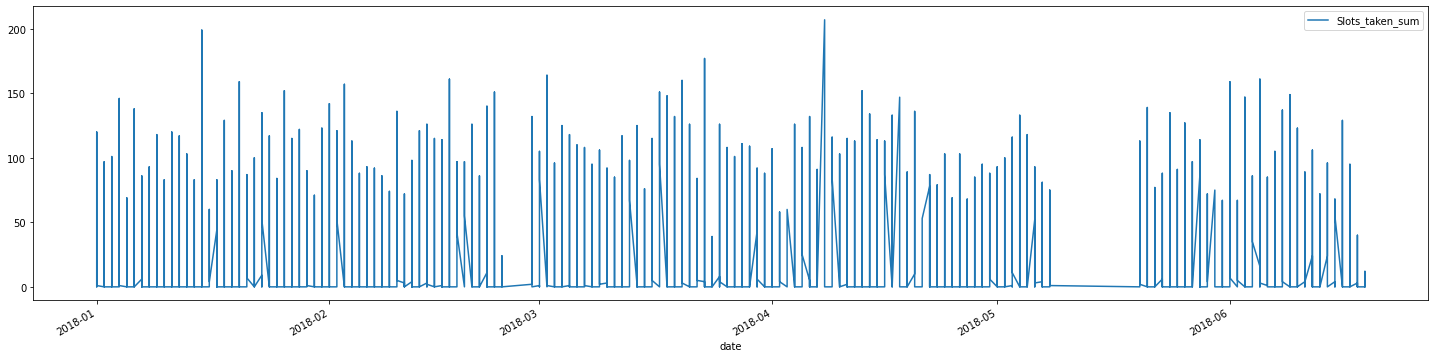

In [62]:
# using iloc to select columns of interest
x5=x4.iloc[:,[1,-1]]
x5
# plotting the time trend of the Slots taken sum
from datetime import datetime
x5['date']=pd.to_datetime(x5['date'])
x5.index=x5['date']
del x5['date']
x5.plot(figsize=(25,6))
plt.show()


In [52]:
x6=x4.iloc[:,[1,6]]
x6

,date,bluecars_returned_sum
0,1/1/2018,103
1,1/2/2018,94
2,1/3/2018,139
3,1/4/2018,104
4,1/5/2018,117
...,...,...
16080,6/15/2018,10
16081,6/16/2018,19
16082,6/17/2018,35
16083,6/18/2018,14


<ipython-input-53-574a65bed0d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x6['date']=pd.to_datetime(x6['date'])


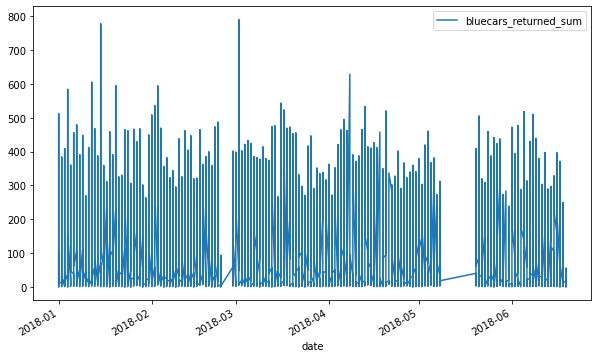

In [53]:
# plotting trend analysis for blue cars ataken and returned
from datetime import datetime
x6['date']=pd.to_datetime(x6['date'])
x6.index=x6['date']
del x6['date']
x6.plot(figsize=(10,6))
plt.show()

In [ ]:
# Data analysis

In [29]:
# postal codes that had the highest number of blue cars taken 
# x4.Postal_code.value_counts()
x5=x4.iloc[:,[0,3,4]].max(), x4.iloc[:,[0,3,4]].min()
x5

(Postal_code      95880
 day_of_week          6
 day_type       weekend
 dtype: object,
 Postal_code      75001
 day_of_week          0
 day_type       weekday
 dtype: object)

In [30]:
# finding out the maximum and minimum number of bluecars taken on each daytype and the length of weekays and weekends of our sample size
x4.groupby(['day_type']).bluecars_taken_sum.agg([len, min, max])

,len,min,max
day_type,,,
weekday,9846,0,772
weekend,3697,0,637


In [31]:
# the postalcode with the max and min number of  bluecars returned cars using sort function
x6=x4.iloc[:,[0,3,6]]
x6.sort_values( by='bluecars_returned_sum', ascending=False)
# from the below output ,its clear that the postal code [75016] wasthe one with highest number of blue cars taken and they were taken on a weekend 

,Postal_code,day_of_week,bluecars_returned_sum
2397,75016,4,790
2198,75015,0,778
1810,75012,6,629
1883,75013,4,605
2671,75018,5,595
...,...,...,...
12216,93440,3,0
11881,93370,5,0
10477,93150,3,0
11991,93390,1,0


C:\Users\PATRICK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Slots_freed_sum', ylabel='Density'>

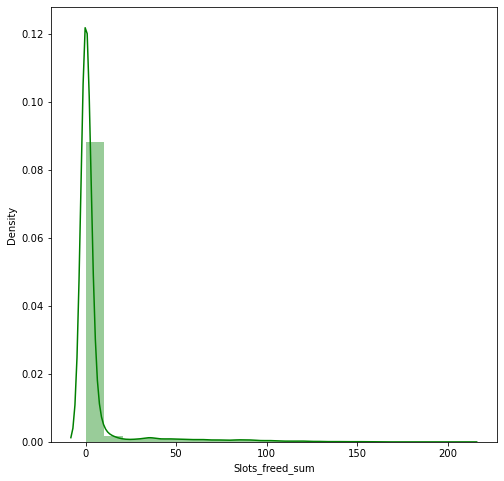

In [56]:
# distribution of bluecars returned
fig, axes=plt.subplots(1,1,figsize=(8,8))
# plt.hist(x='bluecars_returned_sum',data=x4,figsize(12,12))
sns.distplot(x4.Slots_freed_sum,hist=True,kde=True ,color='green',bins=0)

C:\Users\PATRICK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PATRICK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PATRICK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

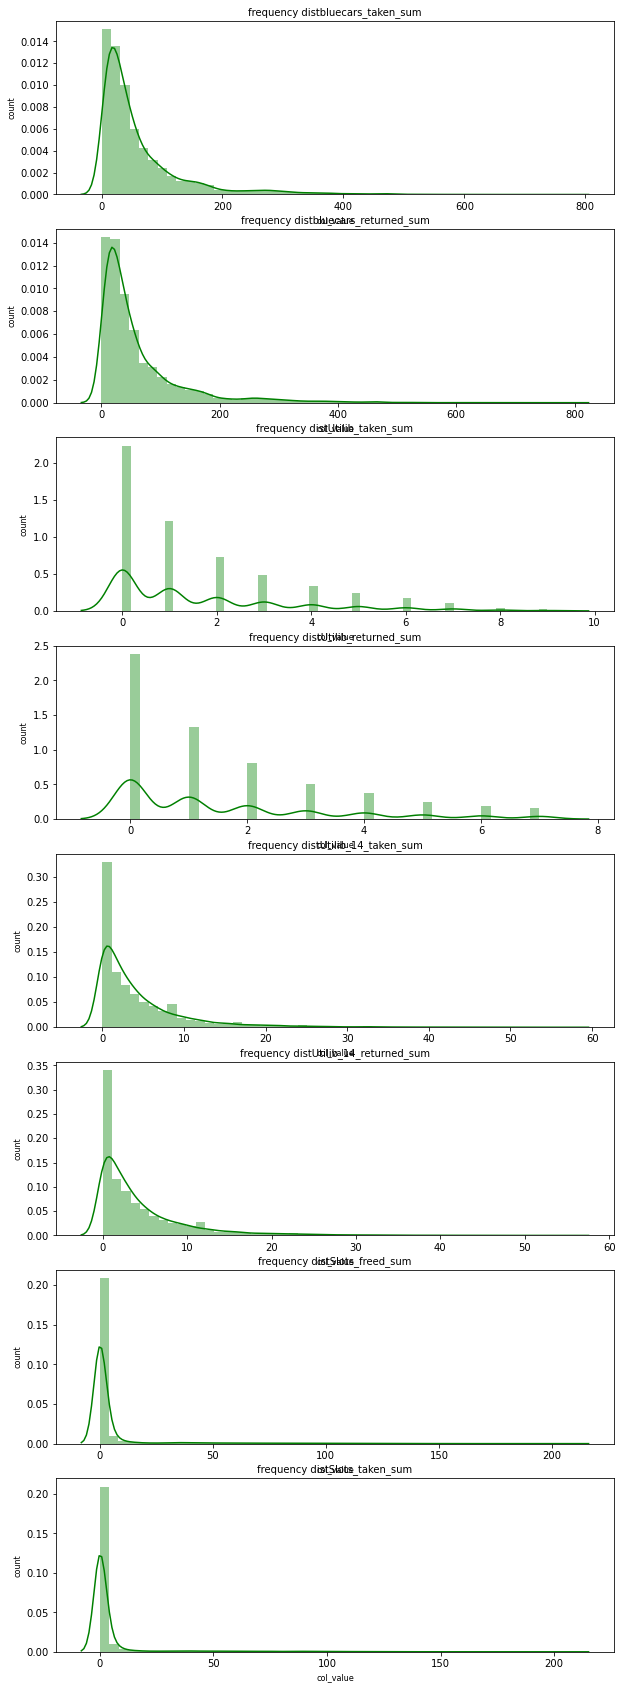

In [60]:
# ploting distribution plots to check the distibution of every column
col_names=['bluecars_taken_sum','bluecars_returned_sum','Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum','Slots_freed_sum','Slots_taken_sum']
fig,ax= plt.subplots(len(col_names),figsize=(10,30))
for i ,col_values in enumerate(col_names):
    sns.distplot(x4[col_values],hist=True,ax=ax[i] ,color='g')
    ax[i].set_title('frequency dist'+col_values,fontsize=10)
    ax[i].set_xlabel('col_value',fontsize=8)
    ax[i].set_ylabel('count',fontsize=8)
plt.show()

# Hypothesis testing

In [33]:
# grouping the data on basis  daytype 
grouped = x4.reset_index().groupby('day_type')
grouped.head()
# further grouping data that was collected on basis  weekend alone 
g2=grouped.get_group('weekend')
g2.head(40)

,index,Postal_code,date,daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
5,5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
12,12,75001,1/13/2018,1440,5,weekend,224,223,2,2,15,15,38,38
13,13,75001,1/14/2018,1440,6,weekend,193,193,2,2,12,12,22,20
19,19,75001,1/20/2018,1439,5,weekend,217,217,2,2,25,25,41,39
20,20,75001,1/21/2018,1440,6,weekend,143,150,4,4,8,8,23,25
26,26,75001,1/27/2018,1440,5,weekend,216,218,1,1,12,12,36,36
27,27,75001,1/28/2018,1440,6,weekend,190,189,5,5,10,10,32,30
33,33,75001,2/3/2018,1438,5,weekend,199,204,4,4,15,15,34,37
34,34,75001,2/4/2018,1440,6,weekend,186,180,2,2,17,17,36,33


In [34]:
# getting to know the descriptive statistics of the data that i have grouped on basis of weekend
g2.describe().T

,count,mean,std,min,25%,50%,75%,max
index,3697.0,9191.317014,4201.003544,5.0,5944.0,9280.0,12769.0,16082.0
Postal_code,3697.0,91098.081417,5621.265393,75001.0,92200.0,92420.0,93700.0,95880.0
daily_data_points,3697.0,1434.455504,20.976725,1318.0,1440.0,1440.0,1440.0,1440.0
day_of_week,3697.0,5.503922,0.500052,5.0,5.0,6.0,6.0,6.0
bluecars_taken_sum,3697.0,67.805247,75.717484,0.0,21.0,44.0,86.0,637.0
bluecars_returned_sum,3697.0,67.617528,76.757336,0.0,20.0,43.0,86.0,629.0
Utilib_taken_sum,3697.0,1.725994,1.967501,0.0,0.0,1.0,3.0,9.0
Utilib_returned_sum,3697.0,1.698134,1.933773,0.0,0.0,1.0,3.0,7.0
Utilib_14_taken_sum,3697.0,4.780903,5.733213,0.0,1.0,3.0,6.0,50.0
Utilib_14_returned_sum,3697.0,4.774141,5.810416,0.0,1.0,3.0,7.0,51.0


In [36]:
# finding out the standard deviation  and mean of slots taken for purpose of hypothesis testing
points = simple_random_sample['Slots_taken_sum']
mu = points.mean()
sigma = points.std()
print("mu: ", mu, ", sigma:", sigma)

mu:  5.225 , sigma: 18.023471164581828


In [43]:
# selecting a random sample for hypothesis testing
x7=g2.iloc[:,[-1]]
simple_random_sample = x7.sample(n=40)
simple_random_sample

,Slots_taken_sum
6419,2
10376,0
13264,0
5902,0
7848,0
3561,0
7056,0
7570,6
12147,0
13095,0


In [44]:
# finding the z_score using the sample population then testing whether to reject null or Alternative hypothesis
from statsmodels.stats.weightstats import ztest 
from statsmodels.stats.weightstats import zconfint
mean_ho=4.58
ztest_score,p_value=ztest(simple_random_sample,value=mean_ho,alternative='two-sided')
print('p value is ',p_value)
print('z_score is',ztest_score)
if p_value<0.05:
    print('Reject null hypothesis and accept Alternative hypothesis')
else:
    print('Accept null hypothesis and reject Alternative hypothesis')


p value is  [0.04876959]
z_score is [-1.97060045]
Reject null hypothesis and accept Alternative hypothesis
